

# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be analyzing No-show appointments dataset that collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment and what are their characteristics. <br /> <br />
And we will pose some questions on the dataset to figure out some information that my help: <br />
1) Are alcoholic patients usually don't show in their appointments ? And could their gender affect their showing ? <br />
2) Who in terms of age misses more appointments? <br />
3) Is the day of the appointment colud have an impact on showing in appointment ?

In [147]:
# import the needed packages for the analysing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [148]:
# Load the data
df = pd.read_csv('NoShowAppointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> For better understanding, We will clarify the meaning of the columns of our dataset: <br />
01 - PatientId: Identification of a patient. <br />
02 - AppointmentID: Identification of each appointment. <br />
03 - Gender: Male or Female. <br />
04 - ScheduledDay: The day someone called or registered the appointment, this is before appointment of course. <br />
05 - AppointmentDay: The day of the actuall appointment, when they have to visit the doctor. <br />
06 - Age: How old is the patient. <br />
07 - Neighbourhood: Where the appointment takes place. <br />
08 - Scholarship: can be (1) True or (0) False. <br />
09 - Hipertension: can be (1) True or (0) False. <br />
10 - Diabetes: can be (1) True or (0) False. <br />
11 - Alcoholism: can be (1) True or (0) False. <br />
12 - Handcap: can be (1) True or (0) False. <br />
13 - SMS_received: 1 or more messages sent to the patient. <br />
14 - No-show: can be Yes or No. <br />

In [149]:
# the shape of our dataset
df.shape

(110527, 14)

In [150]:
# some information about our dataset
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- it looks that we don't have null values.

In [151]:
# some descriptive statistics about our dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

First of all, we will drop the columns that we don't need.

In [152]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay'],axis=1, inplace=True)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Second of all, we wil change the names of some the columns to be more practical and consistent.

In [153]:
df.rename(columns={'AppointmentDay':'Appointment_Date','No-show': 'No_Show',
                  'Handcap':'Handicap','SMS_received': 'SMS_Received' }, inplace=True)
df.head(1)

,Gender,Appointment_Date,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


we will change the format of the 'Appointment_Date' column to make it have only the data:

In [154]:
df['Appointment_Date'] = df['Appointment_Date'].apply(lambda x: x.split("T")[0])
df['Appointment_Date'].head()


0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: Appointment_Date, dtype: object

we will investigate more in some features of the dataset to have better knowledge about it.

In [155]:
df['Handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

we found out that there is other values than '0' and '1'. we will consider it as the other degrees of the Handicap, and will make it as it is. <br />
so all the other non-zero values will be considered as a Handicap. It will not make a problem for us.

Third of all, we will change some data types of our data, to make it more readable and consistent:
- Appointment_Date: from object to date time.
- Scholarship, Hipertension, Diabetes, Alcoholism, Handicap, SMS_Received: from integer to boolean.
- No_Show: from object to boolean.

In [156]:
# correct the type of AppointmentDay
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])
# correct the type of Scholarship, Hipertension, Diabetes, Alcoholism, Handicap
df['Scholarship'] = df['Scholarship'].astype(bool)
df['Hipertension'] = df['Hipertension'].astype(bool)
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Alcoholism'] = df['Alcoholism'].astype(bool)
df['Handicap'] = df['Handicap'].astype(bool)
df['SMS_Received'] = df['SMS_Received'].astype(bool)
# correct the type of No_Show
df['No_Show'] = df['No_Show'].apply(lambda x: 1 if x == 'Yes' else 0)
df['No_Show'] = df['No_Show'].astype(bool)

we will make a new column to indicate the day of the appointment.

In [157]:
df['Appointment_Day'] = df['Appointment_Date'].dt.day_name()
df['Appointment_Day'].head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: Appointment_Day, dtype: object

Check for the validity of the value of the age column:

In [158]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

We have to remove the rows that have '-1' value

In [159]:
# get the rows that don't have a valid value
df_notValidAge = df[df['Age'] < 0]
df_notValidAge

,Gender,Appointment_Date,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Appointment_Day
99832,F,2016-06-06,-1,ROMÃO,False,False,False,False,False,False,False,Monday


In [160]:
df.drop(df_notValidAge.index, inplace=True)
df[df['Age'] < 0]

,Gender,Appointment_Date,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Appointment_Day


Forth of all, we have to check if there is duplicated rows or not.

In [161]:
df.duplicated().sum()

15375

In [162]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [163]:
print(df.duplicated().sum())
print(df.shape)

0
(95151, 12)


In [164]:
df.head()

,Gender,Appointment_Date,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Appointment_Day
0,F,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,Friday
1,M,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False,Friday
2,F,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False,Friday
3,F,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,Friday
4,F,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,False,Friday


<a id='eda'></a>
## Exploratory Data Analysis

### Q1) Are alcoholic patients usually don't show in their appointments ? and could their gender affect their showing ? 


In [165]:
# Get the mean by the group by of 'Alcoholism' and 'Gender' on the 'No_Show' column
df_genAlc = df.groupby(['Alcoholism','Gender']).mean().No_Show
df_genAlc 

Alcoholism  Gender
False       F         0.218612
            M         0.214743
True        F         0.267442
            M         0.196002
Name: No_Show, dtype: float64

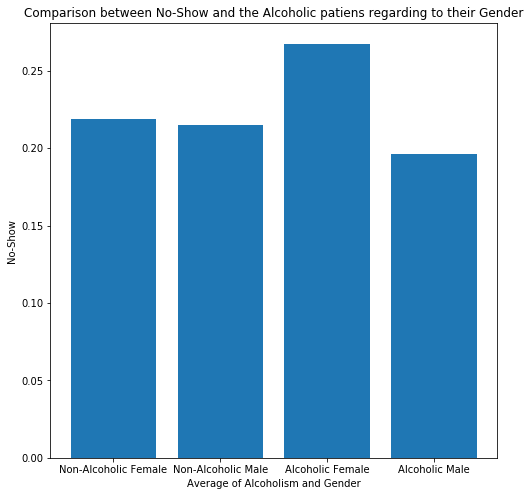

In [166]:
# a bar chart that visualise the comparison between No-Show and the Alcoholic patiens regarding to their gender .
categories = ['Non-Alcoholic Female','Non-Alcoholic Male','Alcoholic Female','Alcoholic Male']
plt.subplots(figsize=(8,8))
plt.bar(categories,df_genAlc)
plt.title('Comparison between No-Show and the Alcoholic patiens regarding to their Gender')
plt.xlabel('Average of Alcoholism and Gender')
plt.ylabel('No-Show');

- From the figure above we can observe that there is no much difference between the Alcoholic and Non-Alcoholic Male about showing in the appointment,
but there is a difference in ratio between the Alcoholic and Non-Alcoholic Female about showing in the appointment. <br />
And In general, it looks that Males showing in their appointment better than the Females.

### Q2) Who in terms of age misses more appointments ?

In [167]:
# Get the 'Age' of the patients that miss their appointment
df_ageMiss = df[df['No_Show'] == True].Age
df_ageMiss

6         23
7         39
11        29
17        40
20        30
          ..
110482    43
110484    45
110492    33
110496    37
110516    37
Name: Age, Length: 20693, dtype: int64

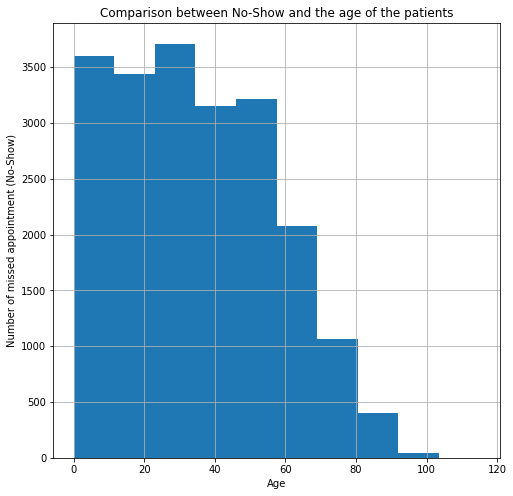

In [168]:
# a histogram that visualise the comparison between No-Show and the age of the patients
df_ageMiss.hist(figsize=(8,8))
plt.title('Comparison between No-Show and the age of the patients')
plt.xlabel('Age')
plt.ylabel('Number of missed appointment (No-Show)');

- we can see that the young people miss their appointment more than the old people, and the plot goes down over the age get higher.

### Q3) Is the day of the appointment colud have an impact on showing in appointment ?

In [169]:
# Get the mean by the group by of 'Appointment_Day' on the 'No_Show' column
df_day = df.groupby('Appointment_Day').mean().No_Show
df_day 

Appointment_Day
Friday       0.227913
Monday       0.224356
Saturday     0.230769
Thursday     0.209004
Tuesday      0.214886
Wednesday    0.212184
Name: No_Show, dtype: float64

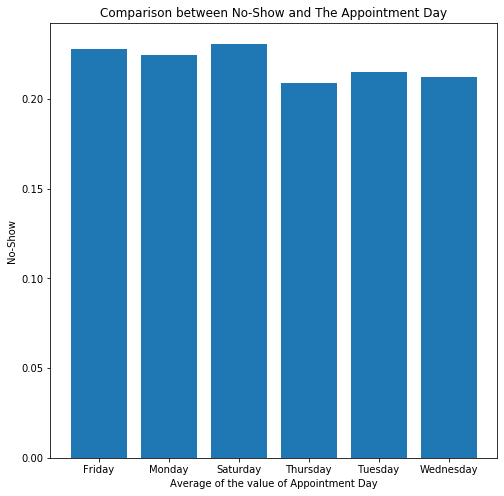

In [170]:
# a bar chart that visualise the comparison between No-Show and Appointment_Day
categories = ['Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday']
plt.subplots(figsize=(8,8))
plt.bar(categories, df_day)
plt.title('Comparison between No-Show and The Appointment Day')
plt.xlabel('Average of the value of Appointment Day')
plt.ylabel('No-Show');

- from the chart above, it shows that there is no such impactation on showing in the appointment by the day of the appointment. since there is no much difference between the values of the days . 

<a id='conclusions'></a>
## Conclusions

> Finally, by summarizing our findings about the posed questions ... <br />
we could say that the Alcoholic Females tend to attend in their appointments more than the Alcoholic Males. <br />
We also conclude that the young people miss their appointment more than the old people. <br />
Moreover, we deduce that the day of the appointment don't have that impaction in showing in the appointment.

## Limitation
> I faced an obstacle throughout the Data cleaning process, it happend at the point when I tried to convert the dates in the 'Appointment_Date' column to the weekdays and put it in the new column 'Appointment_Day'. 
Fortunately, after searching in the internet we figured it out. and it would be better if the day of the appointment feature was there to facilitates the analysis.  <br />
Another problem is that, there is unobvious invalid values in some of the columns such as 'Age', during the data wrangling I found out that there '-1' age in the dataset. so such that typos make you look more deeper in the dataset to solve such that problems. and this makes the process much longer and could create some mistakes in the analysing and Calculating.